# Importação de drives e pacotes

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1mzYOcNQ4htKilBEs4uQnwKBIkk3YNauW"})   # replace the id with id of file you want to access
downloaded.GetContentFile('The Open Supernova Catalog Filtrado.csv')        # replace the file name with your file

downloaded = drive.CreateFile({'id':"1hsaoYVOvSO89Nv1wJBefKvNTK5zAXF3z"})   # replace the id with id of file you want to access
downloaded.GetContentFile('nomes_supernovas_rodrigo.csv')        # replace the file name with your file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

# Parte 1 do projeto - Filtagem de dados

In [ ]:
catalogo = pd.read_csv("The Open Supernova Catalog Filtrado.csv")

In [ ]:
catalogo.keys()

Index(['Name', 'mmax', 'R.A.', 'Dec.', 'z', 'Type', 'Phot.'], dtype='object')

In [ ]:
# apagando as colunas que nao usaremos

catalogo = catalogo.drop(['mmax'],axis=1)
catalogo = catalogo.drop(['R.A.'],axis=1)
catalogo = catalogo.drop(['Dec.'],axis=1)
catalogo = catalogo.drop(['z'],axis=1)
catalogo = catalogo.drop(['Type'],axis=1)

catalogo.keys(), len(catalogo)

(Index(['Name', 'Phot.'], dtype='object'), 9821)

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=aa38ee7b42fd58faad72c0601b150747272ac3cce9082a5149529a4d53d28c2e
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
# apagando os arquivos com problema, que estao faltando informação ou que estao corrompidos
nomes_supernovas = np.array(catalogo.Name)
nomes_supernovas = np.delete(nomes_supernovas,2)
nomes_supernovas = np.delete(nomes_supernovas,3)
nomes_supernovas = np.delete(nomes_supernovas,1589)

In [ ]:
#importando os arquivos json da web para o google drive

from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
'''
import wget
for i in range(len(nomes_supernovas)):
  print(nomes_supernovas[i],i)
  wget.download("https://sne.space/astrocats/astrocats/supernovae/output/json/"+nomes_supernovas[i]+".json")
  jsontemporario = pd.read_json(nomes_supernovas[i]+'.json')
  jsontemporario.to_json("/content/drive/My Drive/projeto_supernovas/"+nomes_supernovas[i]+".json")
drive.flush_and_unmount()
'''

Mounted at /content/drive/


'\nimport wget\nfor i in range(len(nomes_supernovas)):\n  print(nomes_supernovas[i],i)\n  wget.download("https://sne.space/astrocats/astrocats/supernovae/output/json/"+nomes_supernovas[i]+".json")\n  jsontemporario = pd.read_json(nomes_supernovas[i]+\'.json\')\n  jsontemporario.to_json("/content/drive/My Drive/projeto_supernovas/"+nomes_supernovas[i]+".json")\ndrive.flush_and_unmount()\n'

In [ ]:
#importando os arquivos .json para uma lista

listajson=[]
for i in range(len(nomes_supernovas)):
  print(nomes_supernovas[i],i)
  listajson.append(pd.read_json("/content/drive/My Drive/projeto_supernovas/"+nomes_supernovas[i]+'.json'))

Streaming output truncated to the last 5000 lines.
Gaia19agc 4818
Gaia19aic 4819
Gaia19cem 4820
Gaia19edx 4821
OGLE-2015-SN-008 4822
OGLE-2015-SN-045 4823
OGLE-2015-SN-069 4824
OGLE15dx 4825
OGLE15ei 4826
OGLE15fm 4827
OGLE15fp 4828
OGLE15go 4829
OGLE15nq 4830
OGLE15xa 4831
OGLE15xb 4832
OGLE15xh 4833
OGLE15xo 4834
OGLE16aak 4835
OGLE16ash 4836
OGLE18li 4837
OGLE19lli 4838
PS15afn 4839
PS15ake 4840
PS15ale 4841
PS15aln 4842
PS15atu 4843
PS15aww 4844
PS15bej 4845
PS15bez 4846
PS15bff 4847
PS15biy 4848
PS15bkc 4849
PS15blb 4850
PS15bo 4851
PS15bsf 4852
PS15bvu 4853
PS15bvv 4854
PS15cd 4855
PS15cfl 4856
PS15cjc 4857
PS15cqf 4858
PS15cur 4859
PS15dht 4860
PS15dip 4861
PS15dlk 4862
PS15dqk 4863
PS15ea 4864
PS15hn 4865
PS15hz 4866
PS15ic 4867
PS15ir 4868
PS15pj 4869
PS15ux 4870
PS15xv 4871
PS16abj 4872
PS16ar 4873
PS16dsi 4874
PS16fds 4875
PS17bhf 4876
PS17bmo 4877
PS17ccj 4878
PS17fas 4879
SN2016aa 4880
SN2016awb 4881
SN2016eic 4882
SN2016eny 4883
SN2016fnr 4884
SN2016hbb 4885
SN2016iyz 488

In [ ]:
tempos=[]
bandas=[]
magnitudes=[]
tipo=[]
maxmagap=[]
maxmagab=[]
tempomax=[]
ra=[]
dec=[]
z=[]

#fazendo uma lista para cada informação util no arquivo json, informações obrigatorias nao nulas são: 
#tipo, dec, ra, tempomax, magmaxap,tempo da fotometria, banda da fotometria, magnitude da fotometria

for i in range(len(listajson)):
  #print(nomes_supernovas[i],i)

  if ('claimedtype' in listajson[i][nomes_supernovas[i]].keys() and 'dec' in listajson[i][nomes_supernovas[i]].keys() and 
      'ra' in listajson[i][nomes_supernovas[i]].keys() and 'maxdate' in listajson[i][nomes_supernovas[i]].keys() and 
      'maxappmag' in listajson[i][nomes_supernovas[i]].keys() and 'time' in pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).keys() and 
      'band' in pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).keys() and 
      'magnitude' in pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).keys()):
  
    tipo.append([nomes_supernovas[i],listajson[i][nomes_supernovas[i]].claimedtype[0]['value']])
    tempomax.append([nomes_supernovas[i],Time(listajson[i][nomes_supernovas[i]].maxdate[0]['value'].replace('/','-')).mjd]) # Modified Julian Date
    dec.append([nomes_supernovas[i], listajson[i][nomes_supernovas[i]].dec[0]['value']])
    ra.append([nomes_supernovas[i], listajson[i][nomes_supernovas[i]].ra[0]['value']])    
    maxmagap.append([nomes_supernovas[i],listajson[i][nomes_supernovas[i]].maxappmag[0]['value']])


    tempos.append([nomes_supernovas[i],pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).time])
    bandas.append([nomes_supernovas[i],pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).band])
    magnitudes.append([nomes_supernovas[i],pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).magnitude])


    if 'maxabsmag' in listajson[i][nomes_supernovas[i]].keys() and 'redshift' in listajson[i][nomes_supernovas[i]].keys():
      maxmagab.append([nomes_supernovas[i],listajson[i][nomes_supernovas[i]].maxabsmag[0]['value']])
      z.append([nomes_supernovas[i], listajson[i][nomes_supernovas[i]].redshift[0]['value']])
    else:
      maxmagab.append([nomes_supernovas[i], np.nan])
      z.append([nomes_supernovas[i], np.nan])


In [ ]:
len(tempos),len(bandas),len(magnitudes),len(tipo),len(maxmagap),len(maxmagab),len(tempomax)

(7417, 7417, 7417, 7417, 7417, 7417, 7417)

In [ ]:
# deslocando cada elemento das listas de tempo em relação ao seu tempo maximo

tempos_deslocados=[]

for s in range(len(tempos)):
  if type(tempos[s][1])  == pd.core.series.Series:
    sdf=[]
    for k in range(len(tempos[s][1])):
      #print(s,k)
      if type(tempos[s][1][k]) == str:
        sdf.append(float(tempos[s][1][k]) - tempomax[s][1])
      else:
        continue
    tempos_deslocados.append([tempos[s][0] ,sdf])
  else:
    continue
len(tempos_deslocados)

7417

In [ ]:
# arredondando os tempos deslocados

for i in range(len(tempos_deslocados)):
  for j in range(len(tempos_deslocados[i][1])):
    tempos_deslocados[i][1][j] = round(tempos_deslocados[i][1][j], 0)
len(tempos_deslocados)

7417

In [ ]:
# Separando os tempos deslocados de acordo as bandas BG e U

tempos_deslocados_BG=[]
magnitudes_BG=[]
tempos_deslocados_R=[]
magnitudes_R=[]
tempos_deslocados_I=[]
magnitudes_I=[]

for k in range(len(tempos_deslocados)):
  ab=[]
  cd=[]
  ef=[]
  gh=[]
  ij=[]
  kl=[]
  for j in range(len(tempos_deslocados[k][1])):
    if (bandas[k][1][j] == 'B' or bandas[k][1][j] == 'b' or bandas[k][1][j] == 'g' or bandas[k][1][j] == 'G' or 
        bandas[k][1][j] == "B'" or bandas[k][1][j] == "b'" or bandas[k][1][j] == "g'" or bandas[k][1][j] == "G'" or
        bandas[k][1][j] == "'B" or bandas[k][1][j] == "'b" or bandas[k][1][j] == "'g" or bandas[k][1][j] == "'G"):
      ab.append(float(tempos_deslocados[k][1][j]))
      cd.append(float(magnitudes[k][1][j]))
    if (bandas[k][1][j] == 'I' or bandas[k][1][j] == 'i' or bandas[k][1][j] == "I'" or bandas[k][1][j] == "i'" or
        bandas[k][1][j] == "'I" or bandas[k][1][j] == "'i"):
      ef.append(float(tempos_deslocados[k][1][j]))
      gh.append(float(magnitudes[k][1][j]))
    if (bandas[k][1][j] == 'R' or bandas[k][1][j] == 'r' or bandas[k][1][j] == "R'" or bandas[k][1][j] == "r'" or
        bandas[k][1][j] == "'R" or bandas[k][1][j] == "'r"):
      ij.append(float(tempos_deslocados[k][1][j]))
      kl.append(float(magnitudes[k][1][j]))

  if ab != [] and cd != []:
    tempos_deslocados_BG.append([tempos_deslocados[k][0], ab])
    magnitudes_BG.append([magnitudes[k][0], cd])
  if ef != [] and gh!= []:
    tempos_deslocados_I.append([tempos_deslocados[k][0], ef])
    magnitudes_I.append([magnitudes[k][0], gh])
  if ij != [] and kl!= []:
    tempos_deslocados_R.append([tempos_deslocados[k][0], ef])
    magnitudes_R.append([magnitudes[k][0], gh])
      
len(tempos_deslocados_BG),len(magnitudes_BG),len(tempos_deslocados_R),len(magnitudes_R),len(tempos_deslocados_I),len(magnitudes_I)

(6059, 6059, 4117, 4117, 3896, 3896)

In [50]:
# Separando as magnitudes da banda BG relativas aos tempos deslocados em 4 intervalos apenas, de -6 até 6 dias

magnitudesBG1=[] #lista com a média das magnitudes medidas entre -6 e -4 dias, um valor para cada supernova
magnitudesBG2=[] #lista com a média das magnitudes medidas entre -3 e 0 dias, um valor para cada supernova
magnitudesBG3=[] #lista com a média das magnitudes medidas entre 1 e 3 dias, um valor para cada supernova
magnitudesBG4=[] #lista com a média das magnitudes medidas entre 4 e 5 dias, um valor para cada supernova


for i in range(len(tempos_deslocados_BG)):
  if type(tempos_deslocados_BG[i]) == list:
    ab=[]
    cd=[]
    ef=[]
    gh=[]
    for j in range(len(tempos_deslocados_BG[i][1])):
      if tempos_deslocados_BG[i][1][j] >= -6 and tempos_deslocados_BG[i][1][j] <= -4:  #todos os decimais de -6, -5 e -4
        ab.append(magnitudes_BG[i][1][j])
      if tempos_deslocados_BG[i][1][j] >= -3 and tempos_deslocados_BG[i][1][j] <= -1:  #todos os decimais de -3, -2, -1
        cd.append(magnitudes_BG[i][1][j])
      if tempos_deslocados_BG[i][1][j] >= 0 and tempos_deslocados_BG[i][1][j] <= 3:  #todos os decimais de 0, 1, 2 e 3
        ef.append(magnitudes_BG[i][1][j])
      if tempos_deslocados_BG[i][1][j] >= 4 and tempos_deslocados_BG[i][1][j] <= 6:  #todos os decimais de 4, 5 e 6
        gh.append(magnitudes_BG[i][1][j])

    if ab != [] and cd != [] and ef != [] and gh != []: #apenas os valores que tem medida nos 4 intervalos de tempo
      magnitudesBG1.append([magnitudes_BG[i][0] ,np.mean(ab)]) # para cada supernova, adiciono a media das magnitudes no intervalo de tempo escolhido
      magnitudesBG2.append([magnitudes_BG[i][0] ,np.mean(cd)])
      magnitudesBG3.append([magnitudes_BG[i][0] ,np.mean(ef)])
      magnitudesBG4.append([magnitudes_BG[i][0] ,np.mean(gh)])   


#criando uma lista em que cada elemento é uma lista de 4 valores das magnitudes acima (1 para cada intervalo de tempo)
mags_reduzidas_BG=[]
for k in range(len(magnitudesBG1)):
  mags_reduzidas_BG.append([magnitudesBG1[k][0],magnitudesBG1[k][1],magnitudesBG2[k][1],magnitudesBG3[k][1],magnitudesBG4[k][1]])

len(magnitudesBG1),len(magnitudesBG2),len(magnitudesBG3),len(magnitudesBG4),len(mags_reduzidas_BG)

(562, 562, 562, 562, 562)

In [51]:
# Separando as magnitudes da banda R relativas aos tempos deslocados em 4 intervalos apenas, de -6 até 6 dias

magnitudesR1=[] #lista com a média das magnitudes medidas entre -6 e -4 dias, um valor para cada supernova
magnitudesR2=[] #lista com a média das magnitudes medidas entre -3 e 0 dias, um valor para cada supernova
magnitudesR3=[] #lista com a média das magnitudes medidas entre 1 e 3 dias, um valor para cada supernova
magnitudesR4=[] #lista com a média das magnitudes medidas entre 4 e 5 dias, um valor para cada supernova


for i in range(len(tempos_deslocados_R)):
  if type(tempos_deslocados_R[i]) == list:
    ab=[]
    cd=[]
    ef=[]
    gh=[]
    for j in range(len(tempos_deslocados_R[i][1])):
      if tempos_deslocados_R[i][1][j] >= -6 and tempos_deslocados_R[i][1][j] <= -4:  #todos os decimais de -6, -5 e -4
        ab.append(magnitudes_R[i][1][j])
      if tempos_deslocados_R[i][1][j] >= -3 and tempos_deslocados_R[i][1][j] <= -1:  #todos os decimais de -3, -2, -1
        cd.append(magnitudes_R[i][1][j])
      if tempos_deslocados_R[i][1][j] >= 0 and tempos_deslocados_R[i][1][j] <= 3:  #todos os decimais de 0, 1, 2 e 3
        ef.append(magnitudes_R[i][1][j])
      if tempos_deslocados_R[i][1][j] >= 4 and tempos_deslocados_R[i][1][j] <= 6:  #todos os decimais de 4, 5 e 6
        gh.append(magnitudes_R[i][1][j])

    if ab != [] and cd != [] and ef != [] and gh != []: #apenas os valores que tem medida nos 4 intervalos de tempo
      magnitudesR1.append([magnitudes_R[i][0] ,np.mean(ab)]) # para cada supernova, adiciono a media das magnitudes no intervalo de tempo escolhido
      magnitudesR2.append([magnitudes_R[i][0] ,np.mean(cd)])
      magnitudesR3.append([magnitudes_R[i][0] ,np.mean(ef)])
      magnitudesR4.append([magnitudes_R[i][0] ,np.mean(gh)])   


#criando uma lista em que cada elemento é uma lista de 4 valores das magnitudes acima (1 para cada intervalo de tempo)
mags_reduzidas_R=[]
for k in range(len(magnitudesR1)):
  mags_reduzidas_R.append([magnitudesR1[k][0],magnitudesR1[k][1],magnitudesR2[k][1],magnitudesR3[k][1],magnitudesR4[k][1]])

len(magnitudesR1),len(magnitudesR2),len(magnitudesR3),len(magnitudesR4),len(mags_reduzidas_R)

(509, 509, 509, 509, 509)

In [52]:
# Separando as magnitudes da banda I relativas aos tempos deslocados em 4 intervalos apenas, de -6 até 6 dias

magnitudesI1=[] #lista com a média das magnitudes medidas entre -6 e -4 dias, um valor para cada supernova
magnitudesI2=[] #lista com a média das magnitudes medidas entre -3 e 0 dias, um valor para cada supernova
magnitudesI3=[] #lista com a média das magnitudes medidas entre 1 e 3 dias, um valor para cada supernova
magnitudesI4=[] #lista com a média das magnitudes medidas entre 4 e 5 dias, um valor para cada supernova


for i in range(len(tempos_deslocados_I)):
  if type(tempos_deslocados_I[i]) == list:
    ab=[]
    cd=[]
    ef=[]
    gh=[]
    for j in range(len(tempos_deslocados_I[i][1])):
      if tempos_deslocados_I[i][1][j] >= -6 and tempos_deslocados_I[i][1][j] <= -4:  #todos os decimais de -6, -5 e -4
        ab.append(magnitudes_I[i][1][j])
      if tempos_deslocados_I[i][1][j] >= -3 and tempos_deslocados_I[i][1][j] <= -1:  #todos os decimais de -3, -2, -1
        cd.append(magnitudes_I[i][1][j])
      if tempos_deslocados_I[i][1][j] >= 0 and tempos_deslocados_I[i][1][j] <= 3:  #todos os decimais de 0, 1, 2 e 3
        ef.append(magnitudes_I[i][1][j])
      if tempos_deslocados_I[i][1][j] >= 4 and tempos_deslocados_I[i][1][j] <= 6:  #todos os decimais de 4, 5 e 6
        gh.append(magnitudes_I[i][1][j])

    if ab != [] and cd != [] and ef != [] and gh != []: #apenas os valores que tem medida nos 4 intervalos de tempo
      magnitudesI1.append([magnitudes_I[i][0] ,np.mean(ab)]) # para cada supernova, adiciono a media das magnitudes no intervalo de tempo escolhido
      magnitudesI2.append([magnitudes_I[i][0] ,np.mean(cd)])
      magnitudesI3.append([magnitudes_I[i][0] ,np.mean(ef)])
      magnitudesI4.append([magnitudes_I[i][0] ,np.mean(gh)])   


#criando uma lista em que cada elemento é uma lista de 4 valores das magnitudes acima (1 para cada intervalo de tempo)
mags_reduzidas_I=[]
for k in range(len(magnitudesI1)):
  mags_reduzidas_I.append([magnitudesI1[k][0],magnitudesI1[k][1],magnitudesI2[k][1],magnitudesI3[k][1],magnitudesI4[k][1]])

len(magnitudesI1),len(magnitudesI2),len(magnitudesI3),len(magnitudesI4),len(mags_reduzidas_I)

(523, 523, 523, 523, 523)

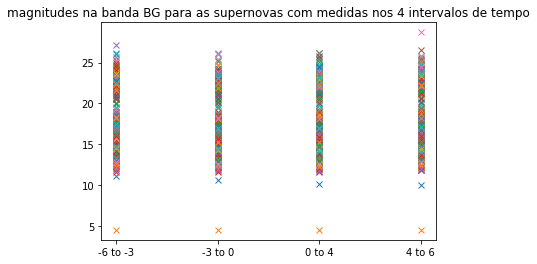

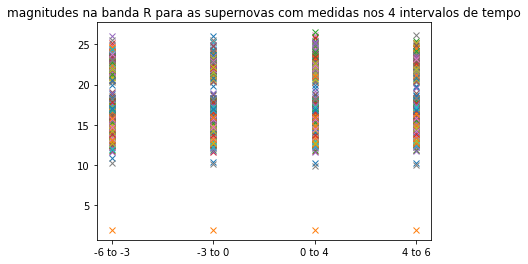

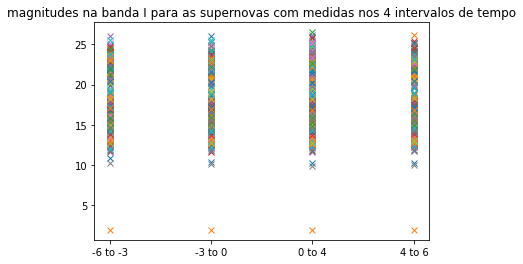

In [53]:
temposplot = ['-6 to -3', '-3 to 0', '0 to 4', '4 to 6']
for i in range(len(mags_reduzidas_BG)):
  plt.plot(temposplot,mags_reduzidas_BG[i][1:5],'x')
plt.title('magnitudes na banda BG para as supernovas com medidas nos 4 intervalos de tempo')
plt.show()

for i in range(len(mags_reduzidas_R)):
  plt.plot(temposplot,mags_reduzidas_R[i][1:5],'x')
plt.title('magnitudes na banda R para as supernovas com medidas nos 4 intervalos de tempo')
plt.show()

for i in range(len(mags_reduzidas_I)):
  plt.plot(temposplot,mags_reduzidas_I[i][1:5],'x')
plt.title('magnitudes na banda I para as supernovas com medidas nos 4 intervalos de tempo')
plt.show()

In [54]:
# escalonando as magnitudes

mags_escalonadas_BG=[]
for k in range(len(maxmagap)):
  for i in range(len(mags_reduzidas_BG)):
    esc1=[]
    for j in range(1,5):
      if mags_reduzidas_BG[i][0] == maxmagap[k][0]:
        esc1.append(mags_reduzidas_BG[i][j] / float(maxmagap[k][1]))
    if esc1 not in mags_escalonadas_BG and esc1 != []:
      mags_escalonadas_BG.append([mags_reduzidas_BG[i][0],esc1])

mags_escalonadas_R=[]
for k in range(len(maxmagap)):
  for i in range(len(mags_reduzidas_R)):
    esc2=[]
    for j in range(1,5):
      if mags_reduzidas_R[i][0] == maxmagap[k][0]:
        esc2.append(mags_reduzidas_R[i][j] / float(maxmagap[k][1]))
    if esc2 not in mags_escalonadas_R and esc2 != []:
      mags_escalonadas_R.append([mags_reduzidas_R[i][0],esc2])

mags_escalonadas_I=[]
for k in range(len(maxmagap)):
  for i in range(len(mags_reduzidas_I)):
    esc3=[]
    for j in range(1,5):
      if mags_reduzidas_I[i][0] == maxmagap[k][0]:
        esc3.append(mags_reduzidas_I[i][j] / float(maxmagap[k][1]))
    if esc3 not in mags_escalonadas_I and esc3 != []:
      mags_escalonadas_I.append([mags_reduzidas_I[i][0],esc3])


len(mags_reduzidas_BG),len(mags_escalonadas_BG),len(mags_reduzidas_R), len(mags_escalonadas_R),len(mags_reduzidas_I), len(mags_escalonadas_I)

(562, 562, 509, 509, 523, 523)

In [55]:
# nomes das supernovas tem em comum nas bandas BG, R, I
nomes_BG_R_I=[]
for i in range(len(mags_reduzidas_BG)):
  for j in range(len(mags_reduzidas_R)):
    for k in range(len(mags_reduzidas_I)):
      if mags_reduzidas_BG[i][0] == mags_reduzidas_R[j][0] == mags_reduzidas_I[k][0] and mags_reduzidas_BG[i][0] not in nomes_BG_R_I:
        nomes_BG_R_I.append(mags_reduzidas_BG[i][0])
      #print(mags_reduzidas_BG[i][0])
len(nomes_BG_R_I)

465

In [56]:
# apagando as supernovas que nao estao nas 3 listas
mags_BG=[]
for i in range(len(mags_escalonadas_BG)):
  for j in range(len(nomes_BG_R_I)):
    if mags_escalonadas_BG[i][0] in nomes_BG_R_I[j] and mags_escalonadas_BG[i] not in mags_BG:
      mags_BG.append(mags_escalonadas_BG[i])

mags_R=[]
for i in range(len(mags_escalonadas_R)):
  for j in range(len(nomes_BG_R_I)):
    if mags_escalonadas_R[i][0] in nomes_BG_R_I[j] and mags_escalonadas_R[i] not in mags_R:
      mags_R.append(mags_escalonadas_R[i])

mags_I=[]
for i in range(len(mags_escalonadas_I)):
  for j in range(len(nomes_BG_R_I)):
    if mags_escalonadas_I[i][0] in nomes_BG_R_I[j] and mags_escalonadas_I[i] not in mags_I:
      mags_I.append(mags_escalonadas_I[i])


len(mags_escalonadas_BG),len(mags_escalonadas_R),len(mags_escalonadas_I),len(mags_BG),len(mags_R),len(mags_I)

(562, 509, 523, 465, 465, 465)

In [57]:
# organizando esses dois conjuntos de magnitudes alfabeticamente de acordo com o nome da supernova
mags_BG = pd.DataFrame(mags_BG).sort_values(0)
mags_R = pd.DataFrame(mags_R).sort_values(0)
mags_I = pd.DataFrame(mags_I).sort_values(0)

In [58]:
# filtando a lista de tipos para ficar apenas com as supernovas que tem magnitude nas duas bandas
tipo_sel=[]
for i in range(len(tipo)):
  for j in range(len(nomes_BG_R_I)):
    if nomes_BG_R_I[j] in tipo[i][0] and tipo[i][0] in nomes_BG_R_I[j] and nomes_BG_R_I[j] not in tipo_sel and tipo[i] != []:
      tipo_sel.append(tipo[i])

len(tipo),len(tipo_sel)

(7417, 465)

In [59]:
# organizando o tipo de acordo com o nome das supernovas em ordem alfabetica

tipos = pd.DataFrame(tipo_sel).sort_values(0)

In [60]:
# adicionando todas essas informações à um dataframe

catalogo_novo = []
catalogo_novo = pd.DataFrame(catalogo_novo)

catalogo_novo = pd.concat([catalogo_novo, tipos], axis=1)
catalogo_novo = catalogo_novo.rename(columns={0: 'nomes', 1:'tipos'})

catalogo_novo = pd.concat([catalogo_novo, mags_BG], axis=1)
catalogo_novo = catalogo_novo.rename(columns={1: 'mags_BG'})

catalogo_novo = pd.concat([catalogo_novo, mags_R], axis=1)
catalogo_novo = catalogo_novo.rename(columns={1: 'mags_R'})

catalogo_novo = pd.concat([catalogo_novo, mags_I], axis=1)
catalogo_novo = catalogo_novo.rename(columns={1: 'mags_I'})

# apagando as colunas extras com nomes e reiniciando os indices
catalogo_novo = catalogo_novo.drop([0],axis=1)
catalogo_novo = catalogo_novo.reset_index()
catalogo_novo = catalogo_novo.drop(['index'],axis=1)

catalogo_novo

,nomes,tipos,mags_BG,mags_R,mags_I
0,ASASSN-14lp,Ia,"[1.0316010058675609, 1.0209555741827325, 1.026...","[1.0481512526776566, 1.0476110645431687, 1.056...","[1.0481512526776566, 1.0476110645431687, 1.056..."
1,Gaia15agh,Ia,"[1.0230995875073658, 1.0285346690237676, 1.036...","[1.0777725397760756, 1.0799882144961699, 1.004...","[1.0777725397760756, 1.0799882144961699, 1.004..."
2,Gaia16aam,Candidate,"[1.2096367650010036, 1.2113786875376278, 1.191...","[1.0371282360024083, 1.0964940798715634, 1.042...","[1.0371282360024083, 1.0964940798715634, 1.042..."
3,LSQ11ot,Ia,"[1.0351217228464418, 1.0366783707865168, 1.046...","[1.0137265917602993, 1.0170786516853931, 1.023...","[1.0137265917602993, 1.0170786516853931, 1.023..."
4,LSQ12gdj,Ia,"[1.10351911736732, 1.0785861275874593, 1.06433...","[1.1306524633821573, 1.1103565616215418, 1.103...","[1.1306524633821573, 1.1103565616215418, 1.103..."
...,...,...,...,...,...
460,SN2018hde,II P,"[1.0393073117097307, 1.045079714128642, 1.0471...","[1.0184167124793841, 1.0073300348176653, 1.003...","[1.0184167124793841, 1.0073300348176653, 1.003..."
461,SNhunt151,LBV to IIn,"[1.2199868073878626, 1.2302110817941951, 1.235...","[1.1273087071240104, 1.132585751978892, 1.1299...","[1.1273087071240104, 1.132585751978892, 1.1299..."
462,iPTF13bvn,Ib,"[1.0674822804314328, 1.0640290556900727, 1.079...","[1.036942372881356, 1.0244406779661017, 1.0186...","[1.036942372881356, 1.0244406779661017, 1.0186..."
463,iPTF13dge,Ia,"[1.0671968190854872, 1.0369532803180916, 1.024...","[1.0563286944996688, 1.0304837640821736, 1.031...","[1.0563286944996688, 1.0304837640821736, 1.031..."


In [61]:
# Salvando esse dataframe em um arquivo csv no drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
catalogo_novo.to_csv('/content/drive/My Drive/projeto_supernovas_csv/supernovas_sharon_gri.csv')

Mounted at /content/drive


In [62]:
#quantidade de tipos

catalogo_novo.tipos.value_counts()

II             249
Ia             152
Ia Pec          11
Ib               9
II P             7
Ic               6
IIb              6
Ic BL            5
IIn              4
Ia-91T           3
Ia-02cx          3
Ib/c             2
.Ia              1
LBV to IIn       1
Ca-rich          1
II Pec           1
Candidate        1
IIn-pec/LBV      1
SLSN             1
BL-Ic            1
Name: tipos, dtype: int64